## 神经网络入门

我们将用三个介绍性示例深入讲解如何使用神经网络解决实际问题，这三个示例分别是：

- 将电影评论划分为正面或负面（二分类问题）
- 将新闻按主题分类（多分类问题）
- 根据房地产数据估算房屋价格（回归问题）

### 神经网络剖析

![](https://ws1.sinaimg.cn/large/007i3XCUgy1fytf5zihxpj30je093wfd.jpg)

一旦确定了网络架构，你还需要选择以下两个参数：

- 损失函数（目标函数）: 在训练过程中需要将其最小化。它能够衡量当前任务是否已成功完成
- 优化器: 决定如何基于损失函数对网络进行更新，它执行的是随机梯度下降（SGD）的某个变体

In [46]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from keras import layers
from keras import losses 
from keras import metrics
from keras import optimizers



layer = layers.Dense(32, input_shape=(784,))

In [2]:
layer

In [3]:
from keras import models 
from keras import layers

model = models.Sequential() 
model.add(layers.Dense(32, input_shape=(784,))) 
model.add(layers.Dense(32))

In [4]:
model

### 电影评论分类：二分类问题

本节使用 IMDB 数据集，它包含来自互联网电影数据库（IMDB）的 50 000 条严重两极分 化的评论。数据集被分为用于训练的 25 000 条评论与用于测试的 25 000 条评论，训练集和测试 集都包含 50% 的正面评论和 50% 的负面评论。

In [5]:
from keras.datasets import imdb

# 仅保留训练数据中前 10 000 个最常出现的单词
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [16]:
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [34]:
y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32')

In [36]:
# 构建DNN
model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

In [37]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
# 也可以自己选择
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [41]:
x_val = x_train[:10000] 
partial_x_train = x_train[10000:]

y_val = y_train[:10000] 
partial_y_train = y_train[10000:]

In [42]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 279us/step - loss: 0.5084 - acc: 0.7812 - val_loss: 0.3797 - val_acc: 0.8683
Epoch 2/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.3005 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.2180 - acc: 0.9287 - val_loss: 0.3088 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.1751 - acc: 0.9438 - val_loss: 0.2840 - val_acc: 0.8831
Epoch 5/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2847 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1150 - acc: 0.9652 - val_loss: 0.3158 - val_acc: 0.8770
Epoch 7/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.0980 - acc: 0.9707 - val_loss: 0.3126 - 

In [43]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [49]:
import matplotlib.pyplot as plt

history_dict = history.history 

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

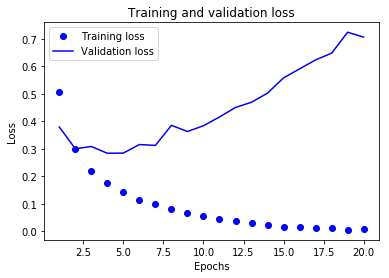

In [50]:
# 'bo' 表示蓝色圆点
plt.plot(epochs, loss_values, 'bo', label='Training loss')
# 'b' 表示蓝色实线
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 

plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()

plt.show()

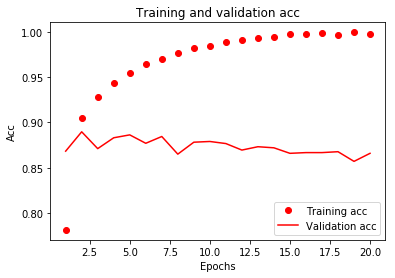

In [51]:
plt.plot(epochs, acc_values, 'ro', label='Training acc') 
plt.plot(epochs, val_acc_values, 'r', label='Validation acc') 

plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('Acc') 
plt.legend()

plt.show()

In [53]:
# 从图中可以看到在第四轮就达到了比较高的精度
model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512) 
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.4745 - acc: 0.8215
Epoch 2/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.2677 - acc: 0.9091
Epoch 3/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.2033 - acc: 0.9283
Epoch 4/4
25000/25000 [==============================] - 5s 189us/step


In [54]:
results

[0.31145524956703186, 0.87592]

In [56]:
pre_results = model.predict(x_test)

In [57]:
pre_results

array([[0.16334483],
       [0.99984753],
       [0.392228  ],
       ...,
       [0.08207919],
       [0.04923759],
       [0.4574142 ]], dtype=float32)

In [60]:
# 添加一个隐藏层
model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=512) 
results = model.evaluate(x_test, y_test)

Epoch 1/10
25000/25000 [==============================] - 2s 93us/step - loss: 0.4585 - acc: 0.8158
Epoch 2/10
25000/25000 [==============================] - 2s 81us/step - loss: 0.2521 - acc: 0.9104
Epoch 3/10
25000/25000 [==============================] - 2s 78us/step - loss: 0.1950 - acc: 0.9296
Epoch 4/10
25000/25000 [==============================] - 2s 81us/step - loss: 0.1644 - acc: 0.9402
Epoch 5/10
25000/25000 [==============================] - 2s 75us/step - loss: 0.1411 - acc: 0.9496
Epoch 6/10
25000/25000 [==============================] - 2s 86us/step - loss: 0.1252 - acc: 0.9550
Epoch 7/10
25000/25000 [==============================] - 2s 78us/step - loss: 0.1046 - acc: 0.9643
Epoch 8/10
25000/25000 [==============================] - 2s 78us/step - loss: 0.0910 - acc: 0.9691
Epoch 9/10
25000/25000 [==============================] - 2s 69us/step - loss: 0.0789 - acc: 0.9746
Epoch 10/10
25000/25000 [==============================] - 2s 79us/step


In [72]:
history_dict = model.history.history

loss_values = history_dict['loss']

acc_values = history_dict['acc']

epochs = range(1, len(loss_values) + 1)

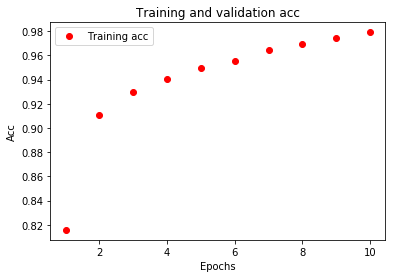

In [73]:
plt.plot(epochs, acc_values, 'ro', label='Training acc') 

plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('Acc') 
plt.legend()

plt.show()

In [71]:
model.history.params

{'batch_size': 512,
 'epochs': 10,
 'steps': None,
 'samples': 25000,
 'verbose': 1,
 'do_validation': False,
 'metrics': ['loss', 'acc']}

In [74]:
from keras.datasets import reuters

# 有 8982 个训练样本和 2246 个测试样本
(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

In [81]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension)) 
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [94]:
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_one_hot(train_labels) 
one_hot_test_labels = to_one_hot(test_labels)

In [95]:
model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000] 
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000] 
partial_y_train = one_hot_train_labels[1000:]

In [96]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 228us/step - loss: 2.5002 - acc: 0.4911 - val_loss: 1.6793 - val_acc: 0.6490
Epoch 2/20
7982/7982 [==============================] - 1s 88us/step - loss: 1.3881 - acc: 0.7041 - val_loss: 1.2759 - val_acc: 0.7230
Epoch 3/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.0457 - acc: 0.7707 - val_loss: 1.1165 - val_acc: 0.7640
Epoch 4/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.8227 - acc: 0.8287 - val_loss: 1.0214 - val_acc: 0.7770
Epoch 5/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.6587 - acc: 0.8639 - val_loss: 0.9697 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 97us/step - loss: 0.5246 - acc: 0.8929 - val_loss: 0.9211 - val_acc: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 92us/step - loss: 0.4283 - acc: 0.9112 - val_loss: 0.9109 - val_acc: 0.8030
Epoch 

In [93]:
len(partial_x_train)

24000

In [97]:
import matplotlib.pyplot as plt

history_dict = history.history 

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

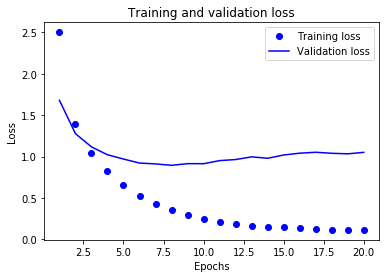

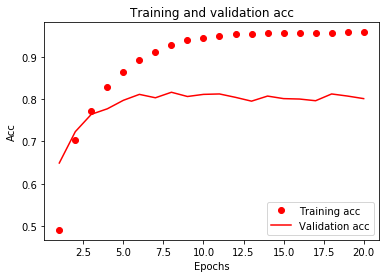

In [98]:
# 'bo' 表示蓝色圆点
plt.plot(epochs, loss_values, 'bo', label='Training loss')
# 'b' 表示蓝色实线
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 

plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()

plt.show()

plt.plot(epochs, acc_values, 'ro', label='Training acc') 
plt.plot(epochs, val_acc_values, 'r', label='Validation acc') 

plt.title('Training and validation acc') 
plt.xlabel('Epochs') 
plt.ylabel('Acc') 
plt.legend()

plt.show()

In [99]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1834372217275156

In [105]:
predictions = model.predict(x_test)

In [109]:
np.argmax(predictions[0])

3

In [110]:
y_train = np.array(train_labels) 
y_test = np.array(test_labels)

In [112]:
# 波士顿房价预测
from keras.datasets import boston_housing

# 404 个训练样本和 102 个测试样本
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [116]:
train_data.shape

(404, 13)

In [117]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [118]:
mean = train_data.mean(axis=0) 
train_data -= mean 
std = train_data.std(axis=0) 
train_data /= std

test_data -= mean 
test_data /= std

In [123]:
def build_model():
    # 因为需要将同一个模型多次实例化， 所以用一个函数来构建模型
    model = models.Sequential() 
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],))) 
    model.add(layers.Dense(64, activation='relu')) 
    model.add(layers.Dense(1)) 
    # MSE 均方误差
    # MAE 平均绝对误差
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 
    return model

In [124]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


![](https://ws1.sinaimg.cn/large/007i3XCUgy1fytjm7s0jmj30i407eq3q.jpg)

In [125]:
all_scores

[2.004705259115389, 2.3208804909545595, 2.9337276066883957, 2.3198187221394906]

In [126]:
np.mean(all_scores)

2.394783019724459

In [127]:
# 为了记录模型在每轮的表现，我们需要修改 训练循环，以保存每轮的验证分数记录
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [128]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

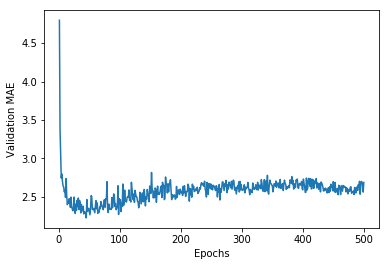

In [129]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

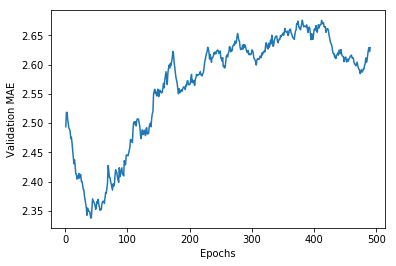

In [130]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [131]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [133]:
test_mse_score, test_mae_score

(17.712916056315105, 2.673099676767985)

In [135]:
test_targets

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])